In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Underlying distribution : Uniform

In [2]:
uniform = np.random.uniform(0,99,1000)
uniform_samples = uniform.copy()

In [3]:
uniform_samples = np.ceil(uniform_samples)
print(uniform_samples.shape)
print(uniform_samples.mean())
print(uniform_samples.std())
print(uniform_samples.max())
print(uniform_samples.min())

(1000,)
50.166
28.920623160644375
99.0
1.0


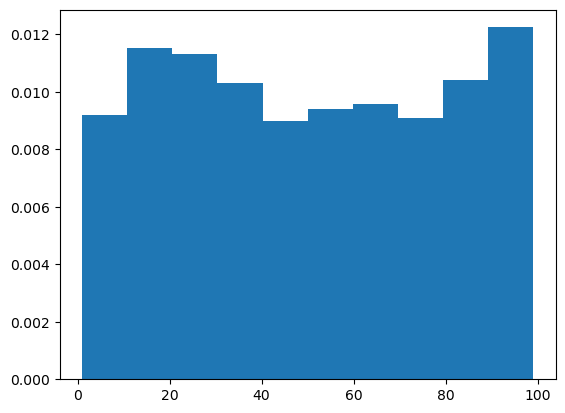

In [4]:
plt.hist(uniform_samples,density = True)
plt.show()

### Making a sample distribution 600 samples of n = 50 each without replacement

In [5]:
def take_sample(arr,size,num_samples):
    """
    arr --> input array,
    size --> size of each sample,
    num_samples --> number of samples each of size = size to be taken
    
    returns list of length = num_samples and each item is a 1d array of size = size
    """
    
    sampling_dist_list = []
    for i in range(num_samples):
        random_samples = np.random.choice(arr,size = size, replace = False)
        sampling_dist_list.append(random_samples)
     
    return sampling_dist_list

In [6]:
clt_samples = take_sample(uniform_samples,size=50,num_samples=600)

In [7]:
clt_means = [i.mean() for i in clt_samples]

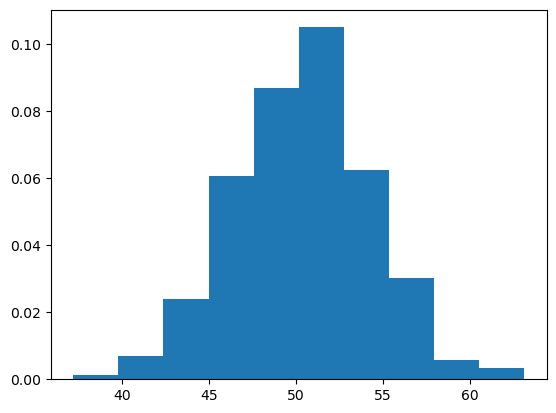

In [8]:
plt.hist(clt_means,density = True)
plt.show()

In [9]:
print("mean of sampling distribution is : ",np.array(clt_means).mean())
print("std dev of sampling distribution is : ",np.array(clt_means).std())

mean of sampling distribution is :  50.296733333333336
std dev of sampling distribution is :  3.9302469806475124


In [12]:
28.9/np.sqrt(50)

4.087077195258244

## Underlying distribution: Binomial

(array([0.83333333, 0.        , 0.96596597, 0.        , 0.        ,
        0.53803804, 0.        , 0.14264264, 0.        , 0.02002002]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

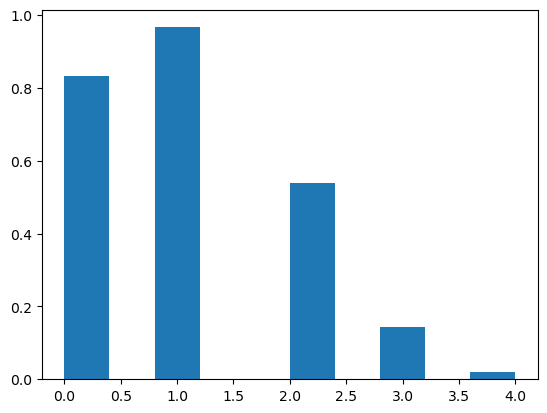

In [27]:
# creating a binomial distribution
binomial = np.random.binomial(5,0.2,999)
plt.hist(binomial,density = True)

In [28]:
binom_sampling = take_sample(binomial,size = 100,num_samples=2999)

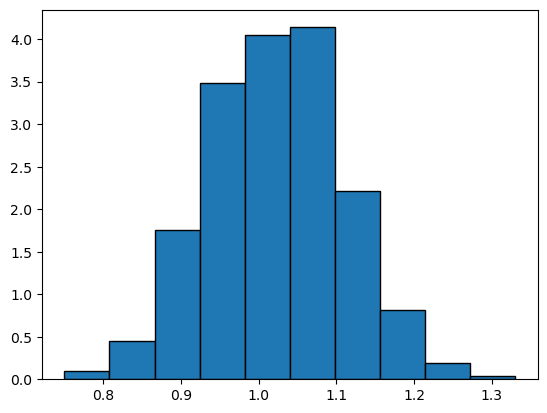

In [29]:
clt_means = [i.mean() for i in binom_sampling]
plt.hist(clt_means,density = True,edgecolor = 'black',bins = 10)
plt.show()

In [30]:
print('Population statistics')
print(binomial.mean())
print(binomial.std())
print('-'*50)
print('Sampling distribution statistics')
print(np.array(clt_means).mean())
print(np.array(clt_means).std())

Population statistics
1.02002002002002
0.9211123968589537
--------------------------------------------------
Sampling distribution statistics
1.0206935645215072
0.08611188970044158


## Central Limit Therorem in Titanic Dataset

In [31]:
titanic = pd.read_csv('data/titanic.csv')

In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Fare', ylabel='Density'>

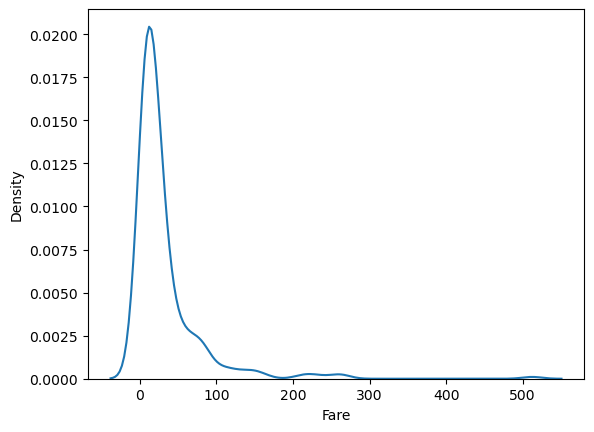

In [36]:
sns.kdeplot(titanic['Fare'])

In [37]:
def take_sample(arr,size,num_samples):
    """
    arr --> input array,
    size --> size of each sample,
    num_samples --> number of samples each of size = size to be taken
    
    returns list of length = num_samples and each item is a 1d array of size = size
    """
    
    sampling_dist_list = []
    for i in range(num_samples):
        random_samples = np.random.choice(arr,size = size, replace = False)
        sampling_dist_list.append(random_samples)
     
    return sampling_dist_list

In [44]:
samples = np.array(take_sample(titanic['Fare'],size = 100, num_samples = 200))

In [45]:
samples.shape

(200, 100)

In [46]:
sampling_means = samples.mean(axis = 1)

<Axes: ylabel='Density'>

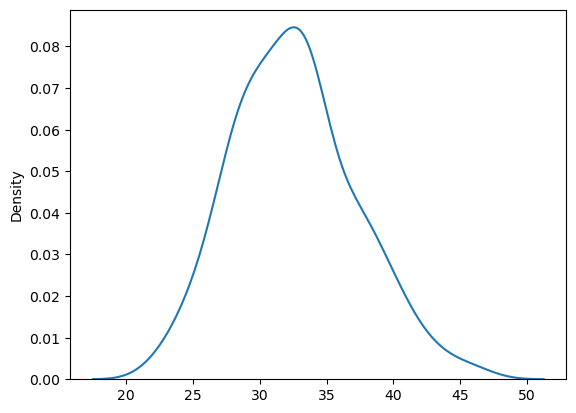

In [47]:
sns.kdeplot(sampling_means)

In [49]:
mean_sampling_dist = sampling_means.mean()
sd_sampling_dist = sampling_means.std()
print('Mean of sampling dist: ',mean_sampling_dist)
print('Std Dev of sampling dist: ',sd_sampling_dist)
print('Standard Error: ',sd_sampling_dist/np.sqrt(100))

Mean of sampling dist:  32.562148045
Std Dev of sampling dist:  4.6044064119791255
Population sd:  0.46044064119791256


In [52]:
# Assuming 95% Confidence Interval

lower_limit = np.round(mean_sampling_dist - 2*sd_sampling_dist/np.sqrt(100),2)
upper_limit = np.round(mean_sampling_dist + 2*sd_sampling_dist/np.sqrt(100),2)

print('Population Mean should lie with 95% Confidence in ({} - {}) range'.format(lower_limit,upper_limit))

Population Mean should lie with 95% Confidence in (31.64 - 33.48) range


In [53]:
# Population Parameters
print('Population mean: ',titanic['Fare'].mean())
print('Population std: ',titanic['Fare'].std())

Population mean:  32.204207968574636
Population std:  49.693428597180905
